[**The link for the tutorial**](https://www.youtube.com/watch?v=2JiXktBn_2M)

**Import Dependencies**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn import metrics 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Preprocessing**

In [3]:
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Hypothesis Data/data-18-fv-tf-idf-scores-200.csv', header=None, sep=',')
data_frame.shape
# /content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Hypothesis Data/data-10-fv-tf-idf-scores-7477-row-31-class-200-feature.csv

(6552, 1571)

In [4]:
header = []

for i in range(len(data_frame.columns)-1):
  header.append(str(i))

header.append('target')

data_frame.columns = header
print(data_frame.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1561', '1562', '1563', '1564', '1565', '1566', '1567', '1568', '1569',
       'target'],
      dtype='object', length=1571)


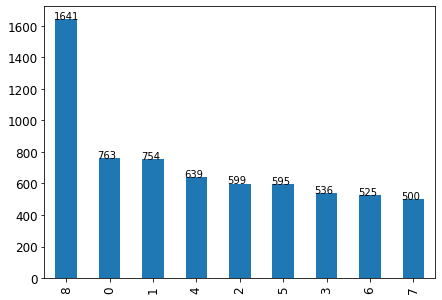

In [5]:
ax = data_frame['target'].value_counts().plot(kind='bar', figsize=(7,5), fontsize=12);
ax.set_alpha(0.8)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, i.get_height(), fontsize=10)

In [6]:
data_frame_shuffled_once = data_frame.sample(frac=1)
data_frame_shuffled_twice = data_frame_shuffled_once.sample(frac=1)
data_frame_shuffled_twice.sample(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,target
4478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.306853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
6078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [0]:
target_counts = data_frame['target'].value_counts()
batch_size = 32
beta = .001
learning_rate = 0.001
num_epoch = 101
num_k_splits = 10
num_features = data_frame.shape[1] - 1
num_labels = target_counts.shape[0]

**Helper Functions**

In [0]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data

In [0]:
def to_label_list(results):
  label_list = []

  for result in results:
    prediction_label = np.argmax(result)
    label_list.append(prediction_label)
  
  return label_list

In [0]:
def get_accuracy(labels, predictions):
  test_batch_size = predictions.shape[0]
  total_correct_prediction = np.sum(np.argmax(predictions, axis=1) == np.argmax(labels, axis=1))
  accuracy = 100.0 * total_correct_prediction / test_batch_size  
  
  return accuracy

In [0]:
def get_fmeasure(labels, predictions):
  
  fmeasures = {}

  for i in range(num_labels):
    fmeasure_data_dict = {
      "gi": 0,
      "pi_intersect_gi": 0,
    }

    fmeasures[str(i)] = fmeasure_data_dict 
    fmeasure_data_dict = {}

  for i in range(len(labels)):
    label = labels[i]
    prediction = predictions[i]
    fmeasures[str(label)]['gi'] += 1

    if prediction == label:
      fmeasures[str(label)]['pi_intersect_gi'] += 1
  
  total_fmeasure_score = 0

  for i in range(num_labels):
    fmeasure_data = fmeasures[str(i)]
    
    gi = fmeasure_data['gi']
    pi_intersect_gi = fmeasure_data['pi_intersect_gi']
    
    fmeasure_score = (2 * pi_intersect_gi)/(2 * gi)
    total_fmeasure_score += fmeasure_score

  fmeasure_score = total_fmeasure_score / num_labels

  return fmeasure_score



Fold: 1


test_accuracy:  91.61585365853658
test_fmeasure:  0.9101026694300187
confusion matrix


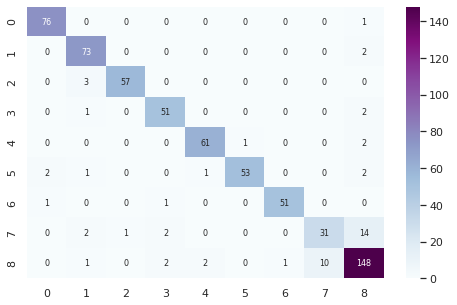



Fold: 2


test_accuracy:  92.98780487804878
test_fmeasure:  0.9236334138471796
confusion matrix


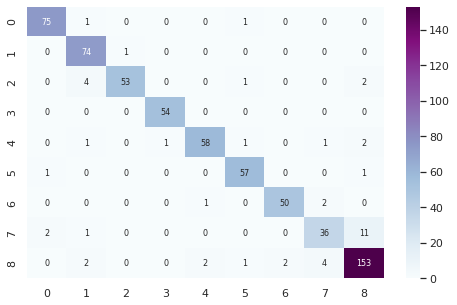



Fold: 3


test_accuracy:  91.29770992366412
test_fmeasure:  0.9004184493532258
confusion matrix


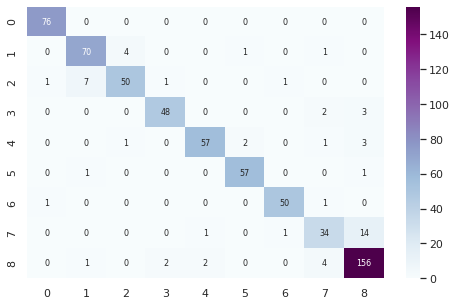



Fold: 4


test_accuracy:  91.45038167938931
test_fmeasure:  0.9122109182805347
confusion matrix


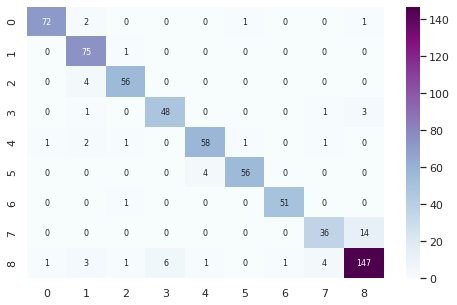



Fold: 5


test_accuracy:  92.67175572519083
test_fmeasure:  0.9204775575729811
confusion matrix


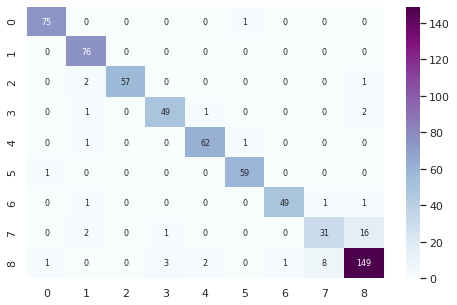



Fold: 6


test_accuracy:  90.38167938931298
test_fmeasure:  0.8974352344287646
confusion matrix


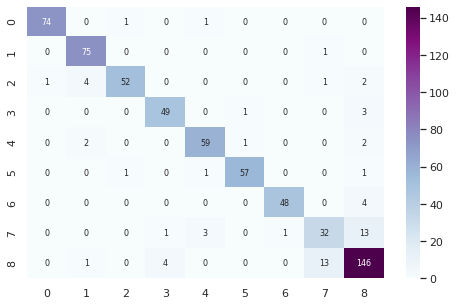



Fold: 7


test_accuracy:  92.51908396946565
test_fmeasure:  0.9154775127485867
confusion matrix


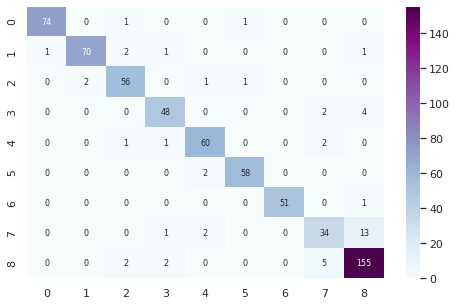



Fold: 8


test_accuracy:  92.36641221374046
test_fmeasure:  0.9251092173400782
confusion matrix


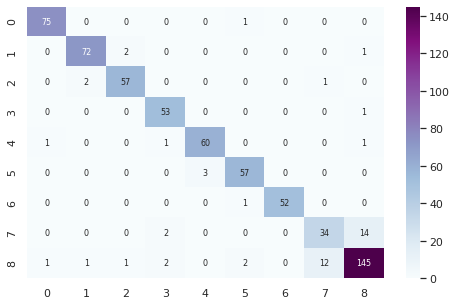



Fold: 9


test_accuracy:  91.14503816793894
test_fmeasure:  0.9044704798987974
confusion matrix


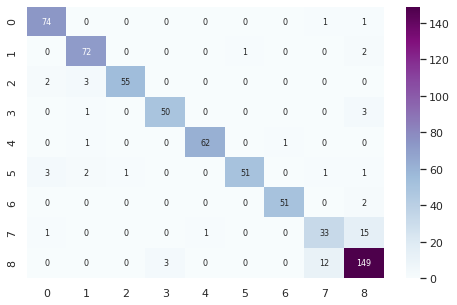



Fold: 10


test_accuracy:  88.2442748091603
test_fmeasure:  0.8835352901130792
confusion matrix


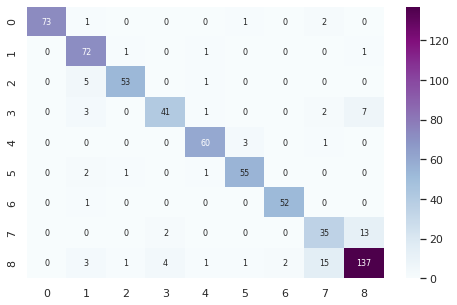

In [12]:
data_labels = data_frame_shuffled_twice['target'].to_numpy()
data_features = data_frame_shuffled_twice.drop('target',axis=1).to_numpy()

history = {}
fold_counter = 1
strat_kfold = StratifiedKFold(n_splits= num_k_splits)

for train_index, test_index in strat_kfold.split(data_features, data_labels):

  print("\n==================================\n")
  print("Fold: %d" % fold_counter)
  print("\n")
  
  kfold_train_features = data_features[train_index]
  kfold_train_labels = data_labels[train_index]

  kfold_test_features = data_features[test_index]
  kfold_test_labels = data_labels[test_index]
  kfold_test_labels_onehot_encoded = np.array([to_onehot(label) for label in kfold_test_labels])

  classifier = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
  model = classifier.fit(kfold_train_features, kfold_train_labels)
  
  test_prediction = model.predict(kfold_test_features)
  test_prediction_proba = model.predict_proba(kfold_test_features)

  test_accuracy = get_accuracy(kfold_test_labels_onehot_encoded, test_prediction_proba)
  print('test_accuracy: ', test_accuracy)

  data_test_label_list = to_label_list(kfold_test_labels_onehot_encoded)
  test_predictions_label_list = to_label_list(test_prediction_proba)
  test_fmeasure = get_fmeasure(data_test_label_list, test_predictions_label_list)
  print('test_fmeasure: ', test_fmeasure)
  print("\n")
  
  # classification report
  # test_classification_report = classification_report(kfold_test_labels, test_prediction)
  # print('classification report')
  # print(test_classification_report)

  test_confusion_matrix = confusion_matrix(kfold_test_labels, test_prediction)
  confusion_matrix_df = pd.DataFrame(test_confusion_matrix, range(num_labels), range(num_labels))
  plt.figure(figsize=(8,5))
  sn.set(font_scale=1.0)
  sn.heatmap(confusion_matrix_df, annot=True, fmt='g', cmap="BuPu", annot_kws={"size": 8}) 

  print('confusion matrix')
  plt.show()

  fold_counter += 1

In [0]:
# near_miss = SMOTE()
# x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

# print(x_undersampled.shape)
# print(y_undersampled.shape)

In [0]:
# near_miss = NearMiss(random_state=42)
# x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

# print(x_undersampled.shape)
# print(y_undersampled.shape)

In [0]:
# smk = SMOTETomek(random_state=42)
# x_undersampled, y_undersampled = smk.fit_sample(data_features, data_labels)

# print(x_undersampled.shape)
# print(y_undersampled.shape)

In [0]:
# data_features_df = pd.DataFrame(data = x_undersampled[0:,0:], 
#                                 index = [i for i in range(x_undersampled.shape[0])],
#                                 columns = [str(i) for i in range(x_undersampled.shape[1])])

# data_labels_df = pd.DataFrame(data = y_undersampled[0:], 
#                                 index = [i for i in range(y_undersampled.shape[0])],
#                                 columns = ['target'])

# data_frame_undersampled = data_features_df.join(data_labels_df)

# print(data_features_df.head())
# print(data_labels_df.head())
# print(data_frame_undersampled.head())